# You work for a financial institution, and your task is to develop a credit risk assessment model using
Support Vector Machines (SVM). The dataset contains information about applicants' financial history,
personal details, and credit risk outcomes (e.g., good or bad credit). Your goal is to build classification
models with both linear and non-linear kernels and evaluate their performance. Answer the following
questions based on this case study:
1. Data Exploration:
a. Load the credit risk dataset using Python libraries like pandas and explore its structure. Describe
the features, target variable, and data distribution.
b. Discuss the importance of credit risk assessment in the financial industry.
2. Classification with Linear SVM:
a. Implement a linear SVM classifier using Python libraries like scikit-learn to predict credit risk
based on applicant information.
b. Split the dataset into training and testing sets, and train the linear SVM model.
c. Evaluate the linear SVM model's performance using metrics such as accuracy, precision, recall,
and F1-score.
3. Classification with Non-linear SVM:
a. Implement a non-linear SVM classifier using Python libraries, applying a kernel (e.g., Radial Basis
Function or Polynomial kernel) to predict credit risk.
b. Split the dataset into training and testing sets, and train the non-linear SVM model.
c. Discuss the need for non-linear SVM and the choice of kernel.
d. Evaluate the non-linear SVM model's performance using classification metrics.
4. Hyperparameter Tuning:
a. Explain the role of hyperparameters in SVM models and suggest potential hyperparameters to
optimize.
b. Conduct hyperparameter tuning for both the linear and non-linear SVM models and discuss the
impact of different parameter values.
5. Decision Boundary Visualization:
a. Visualize the decision boundaries of both the linear and non-linear SVM models. Discuss the
differences in decision boundaries for linear and non-linear SVMs.
6. Support Vectors:
a. Explain the concept of support vectors and their significance in SVM models.
b. Calculate the support vectors for both the linear and non-linear SVM models.
7. Model Comparison:
a. Compare the performance of the linear and non-linear SVM models in credit risk assessment.
b. Discuss the trade-offs and use cases for linear and non-linear SVMs in classification tasks.
8. Real-World Application:
a. Describe the practical applications of credit risk assessment in the financial industry.
b. Discuss how accurate credit risk assessment can benefit financial institutions and borrowers.
9. Presentation and Recommendations:
a. Prepare a presentation or report summarizing your analysis, results, and recommendations for
the financial institution. Highlight the importance of credit risk assessment and the advantages of
SVM models in this context.
In this case study, you are required to demonstrate your ability to use Support Vector Machines with both
linear and non-linear kernels for credit risk assessment, understand the importance of hyperparameter
tuning, and communicate the practical applications of credit risk modeling in the financial sector.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Housing']=le.fit_transform(data['Housing'])
data['Saving accounts']=le.fit_transform(data['Saving accounts'])
data['Checking account']=le.fit_transform(data['Checking account'])
data['Saving accounts']=le.fit_transform(data['Saving accounts'])
data['Purpose']=le.fit_transform(data['Purpose'])
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,4,0,1169,6,5
1,1,22,0,2,1,0,1,5951,48,5
2,2,49,1,1,1,0,3,2096,12,3
3,3,45,1,2,0,0,0,7882,42,4
4,4,53,1,2,0,0,0,4870,24,1


In [4]:
data.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        1000 non-null   int64
 1   Age               1000 non-null   int64
 2   Sex               1000 non-null   int32
 3   Job               1000 non-null   int64
 4   Housing           1000 non-null   int32
 5   Saving accounts   1000 non-null   int64
 6   Checking account  1000 non-null   int32
 7   Credit amount     1000 non-null   int64
 8   Duration          1000 non-null   int64
 9   Purpose           1000 non-null   int32
dtypes: int32(4), int64(6)
memory usage: 62.6 KB
None


In [6]:
print(data.describe().T)

                   count      mean          std    min      25%     50%  \
Unnamed: 0        1000.0   499.500   288.819436    0.0   249.75   499.5   
Age               1000.0    35.546    11.375469   19.0    27.00    33.0   
Sex               1000.0     0.690     0.462725    0.0     0.00     1.0   
Job               1000.0     1.904     0.653614    0.0     2.00     2.0   
Housing           1000.0     1.071     0.531264    0.0     1.00     1.0   
Saving accounts   1000.0     1.105     1.580023    0.0     0.00     0.0   
Checking account  1000.0     1.577     1.257638    0.0     0.00     1.0   
Credit amount     1000.0  3271.258  2822.736876  250.0  1365.50  2319.5   
Duration          1000.0    20.903    12.058814    4.0    12.00    18.0   
Purpose           1000.0     2.878     1.978138    0.0     1.00     3.0   

                      75%      max  
Unnamed: 0         749.25    999.0  
Age                 42.00     75.0  
Sex                  1.00      1.0  
Job                  2.00 

In [7]:
print(data.nunique())


Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        5
Checking account       4
Credit amount        921
Duration              33
Purpose                8
dtype: int64


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Job'}>,
        <Axes: title={'center': 'Housing'}>,
        <Axes: title={'center': 'Saving accounts'}>],
       [<Axes: title={'center': 'Checking account'}>,
        <Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Purpose'}>, <Axes: >, <Axes: >]],
      dtype=object)

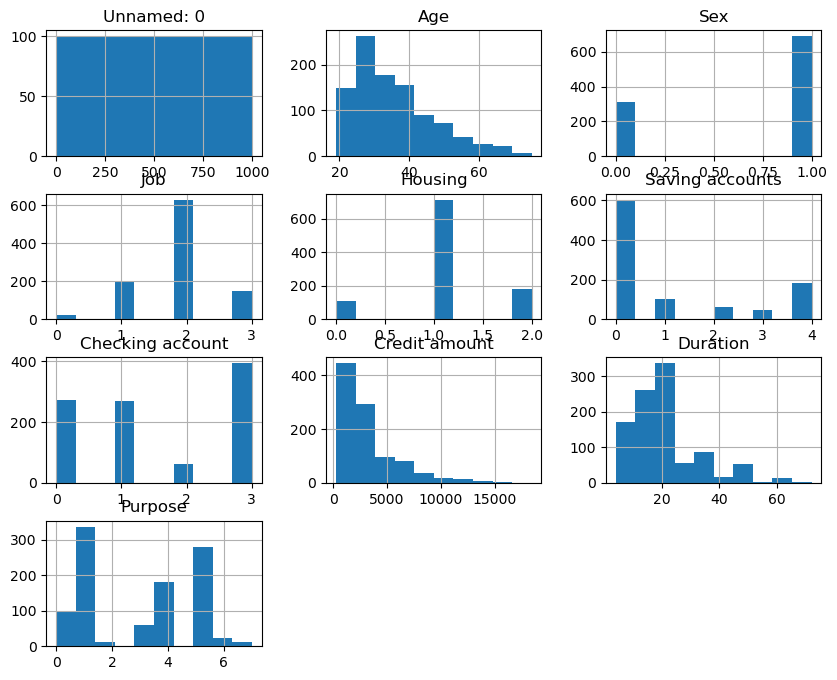

In [8]:
data.hist(figsize=(10,8))

<Axes: xlabel='Duration', ylabel='count'>

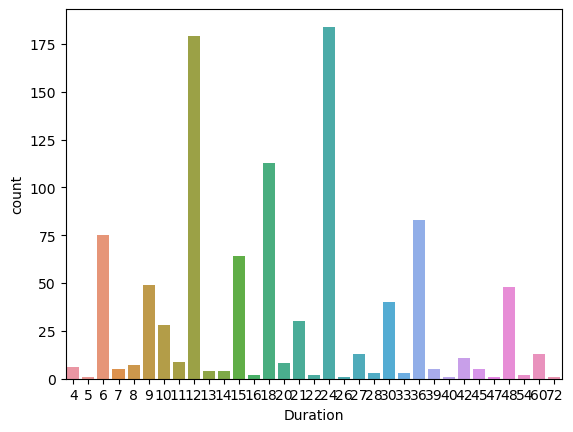

In [9]:
sns.countplot(x='Duration',data=data)

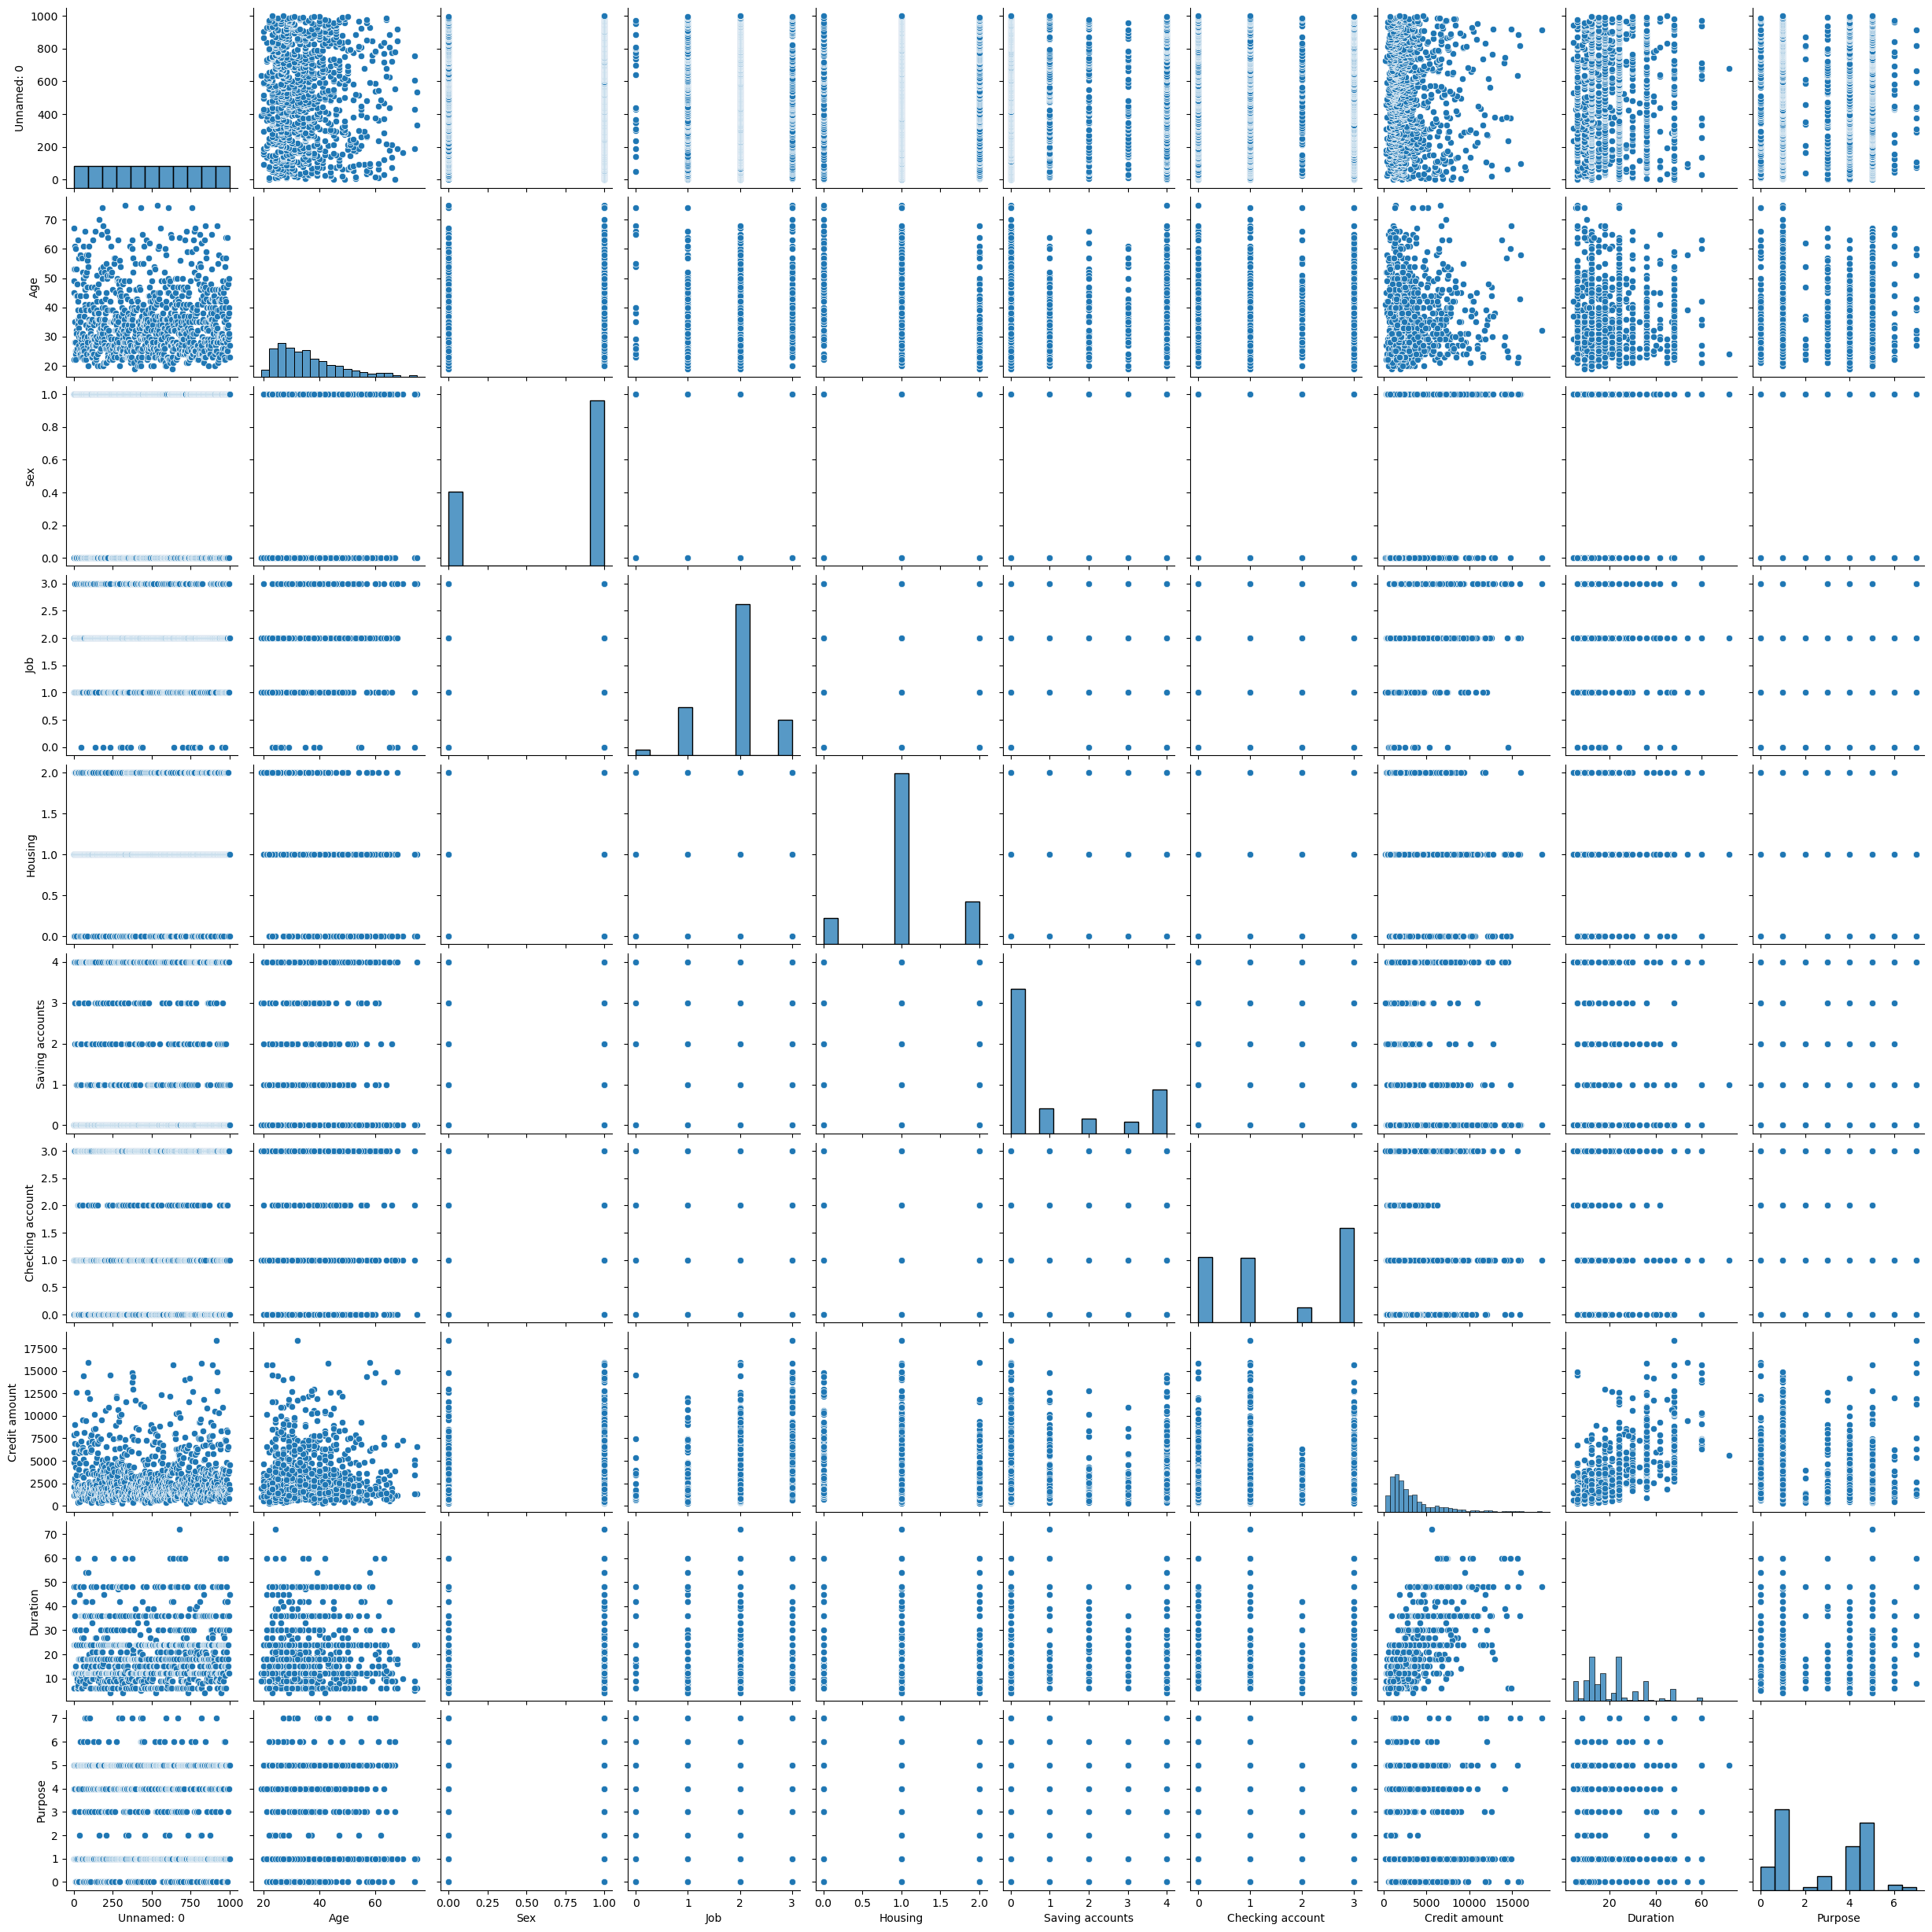

In [11]:
sns.pairplot(data)

<Axes: >

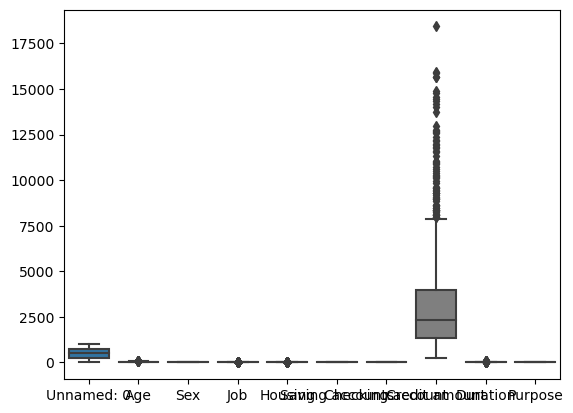

In [10]:
sns.boxplot(data)

In [11]:
x=data.iloc[:,:-1]
x.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,0,67,1,2,1,4,0,1169,6
1,1,22,0,2,1,0,1,5951,48
2,2,49,1,1,1,0,3,2096,12
3,3,45,1,2,0,0,0,7882,42
4,4,53,1,2,0,0,0,4870,24


In [12]:
y=data.iloc[:,-1:]
y.head()

,Purpose
0,5
1,5
2,3
3,4
4,1


b.Credit risk assessment is of paramount importance in the financial industry for several reasons:

Risk Mitigation: Lending money or providing financial services inherently carries risks. Credit risk assessment helps financial institutions evaluate the likelihood of borrowers defaulting on their obligations. By identifying high-risk borrowers, institutions can take appropriate measures to mitigate those risks.

Profitability: Assessing credit risk allows financial institutions to offer loans and credit lines to customers with varying risk profiles. By charging higher interest rates to riskier borrowers, they can maintain profitability while accommodating a diverse customer base.

Regulatory Compliance: Financial institutions are often subject to regulations that require them to assess and manage credit risk. Compliance with these regulations is essential to avoid legal and financial penalties.

Portfolio Management: Credit risk assessment is crucial for managing a diverse portfolio of loans and investments. It helps balance risk and return, ensuring that the portfolio remains healthy and profitable.

Investor Confidence: Investors, including shareholders and bondholders, rely on accurate credit risk assessments to make informed decisions. A strong credit risk management framework can enhance investor confidence and contribute to a company's reputation in the financial markets.

Economic Stability: Effective credit risk assessment can contribute to the stability of the financial system and the broader economy. By identifying and managing systemic risks, it can help prevent financial crises.

Customer Relationships: Responsible lending practices, based on sound credit risk assessment, help build trust with customers. This trust can lead to long-lasting and mutually beneficial customer relationships.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (800, 9)

Training data-Y- shape:	 (800, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (200, 9)

Testing data(Y-Input) shape:	 (200, 1)


In [14]:
lin_svc=LinearSVC()
print('***Linear svc****')
print('Training Phase\n')
lin_svc. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=lin_svc.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

***Linear svc****
Training Phase



C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [1 1 1 1 1 1 2 0 7 0 2 1 0 1 1 2 1 1 1 2 1 1 1 6 1 5 6 1 5 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 5 7 1 1 7 7 1 1 1 2 1 1 2 1 1 1 2 1 2 2 2 7 1 2
 1 5 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 5 5 1 7 7 1 2 6 7 1 1 1 1 1 1 1 1 2 5
 1 5 1 1 2 6 1 1 7 1 1 2 1 1 0 5 1 6 1 1 1 6 1 1 1 2 1 1 5 1 1 1 1 1 2 1 2
 2 2 1 2 1 1 7 1 1 1 1 5 1 2 5 6 1 0 1 1 1 1 1 5 1 5 1 1 1 2 2 2 1 6 1 1 2
 5 7 1 6 1 1 1 2 1 1 2 2 1 2 2]
Test is also done

****************************************************************************************************
Accuracy Score:	 0.205

Confusion Matrix:
 [[ 1  8  1  0  0  1  2  3]
 [ 0 34 22  0  0  3  4  1]
 [ 0  2  0  0  0  0  0  0]
 [ 0 12  1  0  0  1  0  1]
 [ 1 30  7  0  0  5  1  2]
 [ 3 34  3  0  0  5  2  3]
 [ 0  2  2  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  1]]

Classification report :
               preci

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (800, 9)

Training data-Y- shape:	 (800, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (200, 9)

Testing data(Y-Input) shape:	 (200, 1)


In [16]:
from sklearn.metrics import mean_squared_error,r2_score
#SVR with Non linear kernal - rbf
nonlin_svr=SVR()
print('='*100)
print('Hyperparameter:\n',nonlin_svr.get_params())
print('='*100)
#Train phase
nonlin_svr.fit(xtrain,ytrain)
#Testing phase
ypred=nonlin_svr.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [3.77485471 3.33537983 3.7184387  3.79572357 3.37142477 3.68797637
 3.30932605 3.00397293 2.94723267 3.95328532 1.25864834 3.59910133
 3.32165325 3.90894567 3.71166021 1.02322609 3.09955492 3.14433471
 3.63623515 1.13453874 3.77822177 3.72088122 3.96344473 3.84666043
 3.84069936 4.00765788 3.86408075 3.75686123 3.40364068 3.71672291
 1.04461056 3.535996   3.61267683 3.40617548 3.91929798 3.36800033
 3.07655745 3.90139832 3.44284145 3.43402064 3.65353991 3.91136305
 3.81036779 3.98566155 3.71464265 3.93464198 3.40654946 3.62157823
 3.79640541 1.1122335  3.1288554  3.78036601 3.85605762 3.95920757
 1.00972357 1.13744297 3.77466563 3.73801417 3.73068847 4.01113751
 3.36577344 3.82670173 1.14123712 3.92524729 3.60387954 3.40538997
 0.98263077 3.76814898 1.07201638 1.58320373 1.013851

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The need for non-linear Support Vector Machines (SVM) and the choice of kernel are essential considerations in machine learning:

1. Non-Linearity: Linear SVM is effective when the data is linearly separable, but real-world data often contains non-linear relationships. Non-linear SVM is necessary to model and capture complex, non-linear decision boundaries that linear SVM cannot handle.

2. Complex Data Patterns: Many real-world problems, like image classification or speech recognition, involve intricate patterns that cannot be adequately captured using linear models. Non-linear SVM, with the right kernel, allows the model to adapt to these intricate patterns.

3. Kernel Choice: The choice of kernel in non-linear SVM is crucial. The Radial Basis Function (RBF) kernel is often a safe choice due to its flexibility in capturing complex relationships. Polynomial kernels are useful for capturing polynomial relationships. The choice of kernel depends on the specific problem and the underlying data structure. Careful kernel selection can significantly impact the model's performance.

4. Overfitting Concerns: While non-linear SVMs can capture complex patterns, there is a risk of overfitting when using highly flexible kernels. The balance between model complexity and generalization should be carefully considered, and hyperparameter tuning is often required to achieve the best results.


Hyperparameters in SVM models are settings that influence how the model learns and makes predictions. They impact the trade-off between model complexity and accuracy. Properly tuning hyperparameters is crucial for achieving the best SVM model performance for a specific problem and dataset.

In [17]:
print(lin_svc.get_params())
print('*'*50)
print(nonlin_svr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': 'warn', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
**************************************************
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


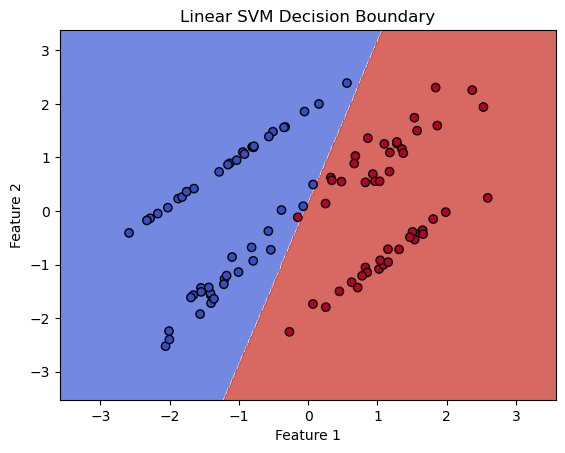

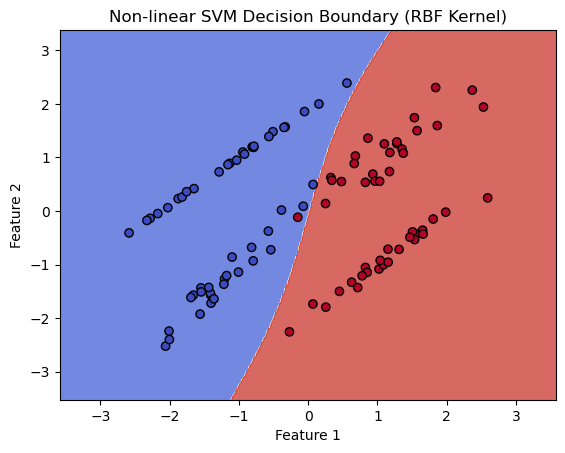

In [18]:
# Visualize the decision boundaries of both the linear and non-linear SVM models

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification

# Generate a synthetic dataset for illustration
x, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Linear SVM
linear_svm_model = LinearSVC(C=1)
linear_svm_model.fit(x, y)

# Non-linear SVM with RBF kernel
non_linear_svm_model = SVC(C=1, kernel='rbf', gamma=0.1)
non_linear_svm_model.fit(x, y)

# Function to plot decision boundaries
def plot_decision_boundary(model,x, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(linear_svm_model, x, y, 'Linear SVM Decision Boundary')
plot_decision_boundary(non_linear_svm_model, x, y, 'Non-linear SVM Decision Boundary (RBF Kernel)')

In [69]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [73]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    y, x = np.meshgrid(y, x)
    xy = np.vstack([x.ravel(), y.ravel()]).T
    P = model.decision_function(xy).reshape(x.shape)

    # plot decision boundary and margins
    ax.contour(x, y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [78]:
model.support_vectors_

array([[ 0.15751244, -0.89332052],
       [-0.56397395,  1.07667544],
       [-0.55407279,  0.88317018],
       [-0.22388238, -0.89200471],
       [ 0.76176288, -0.13193943],
       [-0.46646025, -0.96598462],
       [-0.1234044 , -1.01037568],
       [ 0.50156898, -0.99195901],
       [-0.62895735, -0.53903712],
       [-0.8302708 ,  0.5453622 ],
       [ 0.7787548 ,  0.46115284],
       [ 0.90590937,  0.41396603],
       [ 0.82041883,  0.245991  ],
       [-0.8193373 , -0.68235506],
       [ 0.79522397,  0.51499645],
       [ 0.44903071,  0.73873093],
       [-0.85991318,  0.43667127],
       [ 0.60437737,  0.97557115],
       [-1.09931228,  0.0137488 ],
       [-1.00347462,  0.31073612],
       [ 1.0452505 , -0.28877127],
       [-0.18954489,  1.07584955],
       [ 0.7123298 , -0.52195014],
       [-0.07712741,  1.05135545],
       [-0.28066416,  0.90130026],
       [ 0.51239992, -0.74859943],
       [-1.14179042,  0.19151171],
       [-0.67603908, -0.75037418],
       [ 0.13789197,

In [79]:
from ipywidgets import interact,fixed
interact(plot_svm,N=[10,100,200,400,234],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 100, 200, 400, 234), value=10), Output()), _dom_c…

<function __main__.plot_svm(N=10, ax=None)>

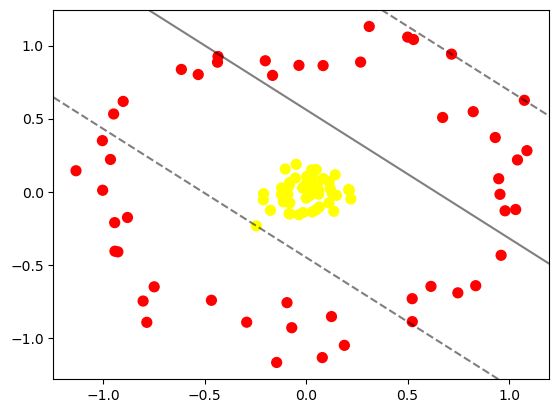

In [75]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

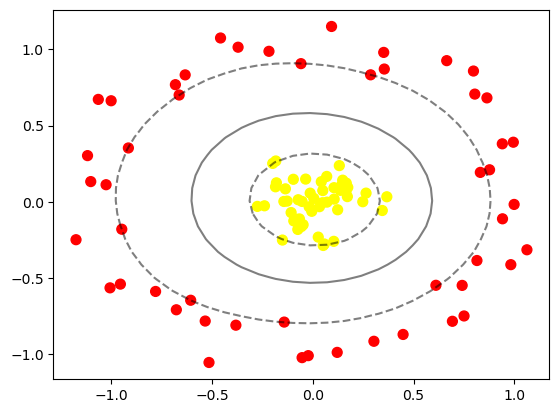

In [76]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='rbf').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

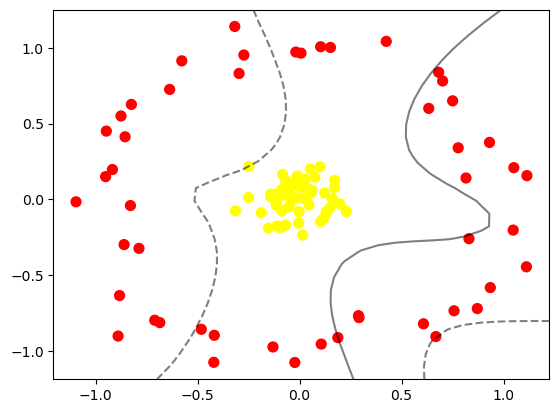

In [77]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='sigmoid').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

Trade-offs and use cases for linear and non-linear SVMs in classification tasks:

Linear SVM:
- Pros: Efficient, interpretable, and suitable for linearly separable data or when a simple model is preferred.
- Use Cases: Text classification, sentiment analysis, spam detection, basic image recognition.

Non-linear SVM (e.g., RBF kernel):
- Pros: Capable of handling complex, non-linear relationships in data, leading to higher accuracy in challenging tasks.
- Use Cases: Image recognition, speech recognition, bioinformatics, financial fraud detection.

Trade-offs:
- Linear SVMs are computationally efficient but may underperform in non-linear scenarios.
- Non-linear SVMs are powerful but require careful parameter tuning and can be prone to overfitting with small datasets.

Practical applications of credit risk assessment in the financial industry:

1. Loan Approvals: Determining whether to approve or deny credit applications from individuals and businesses.

2. Interest Rate Determination: Setting interest rates on loans and credit products based on the assessed risk level of borrowers.

3. Portfolio Management: Managing and optimizing the risk and return of a portfolio of loans and investments.

4. Regulatory Compliance: Ensuring compliance with financial regulations and reporting requirements.

5. Credit Scoring: Developing credit scores for individuals to assess their creditworthiness.

6. Fraud Detection: Identifying potentially fraudulent or high-risk transactions and activities.

7. Risk Mitigation: Implementing risk mitigation strategies to reduce potential financial losses.

Credit risk assessment is fundamental for maintaining financial stability and making informed lending and investment decisions in the financial industry.

Accurate credit risk assessment benefits financial institutions and borrowers:

For Financial Institutions:
1. Reduced Losses: Identifying high-risk borrowers minimizes loan default rates, reducing financial losses.
2. Lower Capital Reserves: Accurate assessments allow for more efficient allocation of capital reserves, optimizing resource utilization.
3. Competitive Advantage: Improved risk management can lead to better financial performance, increased investor confidence, and a competitive edge.
4. Regulatory Compliance: Accurate assessments help meet regulatory requirements, avoiding penalties and legal issues.

For Borrowers:
1. Access to Credit: Accurate assessments ensure credit availability to borrowers who pose lower risks, expanding access to financial services.
2. Lower Interest Rates: Lower-risk borrowers can secure loans at more favorable interest rates, reducing the cost of borrowing.
3. Credit Building: Responsible borrowers can build a positive credit history, enhancing their financial prospects.
4. Financial Well-being: Accurate assessments prevent borrowers from taking on unmanageable debt, promoting long-term financial health.

In summary, accurate credit risk assessment fosters financial stability, responsible lending, and mutual benefits for both financial institutions and borrowers.